PHYS 514 -- PS#6 -- Problem 19

PHYS 514-- PS#6 -- Problem 19 -- Tevfik Can Yüce, 64065

In [1]:
#Importing libraries
import numpy as np
import scipy.constants
import matplotlib.pyplot as plt
import ps6_functions

Part (b):

In [ ]:
#Defining and calculating constants of scaled equations
#Known physical constants
G = scipy.constants.G
rp = 7.405e11
ms = 1.988e30
mJ = 1.898e27
vp = 13.72e3

#Calculated scale constants
t0 = np.sqrt(np.power(rp, 3)/(G*(ms+mJ)))
mu = (ms*mJ)/(ms+mJ)
mu_S = ms/mu
mu_J = mJ/mu
vJ_initial = vp*t0/rp

#Creating initial vector
vec0 = np.asarray([1, 0, 0, 0, 0, vJ_initial, 0, 0]).astype(float)

#Create vector of dts and methods
dt_list = np.asarray([1/64, 1/128, 1/256]).astype(float)
method_list = ['forward-euler', 'implicit-euler', 'symplectic-euler', 'RK4']

#Simulation parameters
t_initial = 0
t_final = 10*np.pi

for dt in dt_list:
    for method in method_list:
        x_arr, t_arr, sim_time = ps6_functions.run_simulation(t_initial=t_initial, t_final=t_final, dt=dt, vec0=vec0, method=method)
        ps6_functions.plot_sim_results(t_arr=t_arr, x_arr=x_arr, method=method, dt=dt, sim_time=sim_time)

Part (c):

In [2]:
#Calculating Lagrange Points

#Defining and calculating constants of scaled equations
#Known physical constants
G = scipy.constants.G
rp = 7.405e11
ms = 1.988e30
mJ = 1.898e27
vp = 13.72e3

#Calculated scale constants
t0 = np.sqrt(np.power(rp, 3)/(G*(ms+mJ)))
mu = (ms*mJ)/(ms+mJ)
mu_S = ms/mu
mu_J = mJ/mu

#Import Libraries
from scipy.optimize import fsolve

#Parameters of circular motion of two massive objects
R_j = 1/mu_J #Scaled radius of circular motion for Jupyter
R_s = -1/mu_S #Scaled radius of circular motion for Sun
omega = 1 #Angular velocity of circular motion of objects remember period was 2\pi

#Finding lagrange point 1
def L1_f(r):
    R = np.abs(R_j - R_s)
    return (mu_S/np.power(R-r, 2)) - (mu_J/np.power(r, 2)) - ( (mu_S*R/(mu_S+mu_J)) - r )*( (mu_J+mu_S)/np.power(R, 3) )

L1_r = fsolve(L1_f, 0.05)
#Coordinates of L1
L1_x = R_j - L1_r[0]
L1_y = 0

#Finding lagrange point 2
def L2_f(r):
    R = np.abs(R_j-R_s)
    return (mu_S/np.power(R+r, 2)) + (mu_J/np.power(r, 2)) - ( (mu_S/(mu_S+mu_J)) * (R+r) )*( (mu_J+mu_S)/np.power(R, 3) )

L2_r = fsolve(L2_f, 0.01)
#Coordinates of L2
L2_x = R_j + L2_r[0]
L2_y = 0

#Finding Lagrange point 3
def L3_f(r):
    R = np.abs(R_j-R_s)
    return (mu_S/np.power(R-r, 2)) + (mu_J/np.power(2*R - r, 2)) - ( (mu_J*R)/(mu_J + mu_S) + R - r)*((mu_S+mu_J)/np.power(R,3))

L3_r = fsolve(L3_f, 0.01)
#Coordinates of L3
L3_x = R_s - R_j - L3_r[0]
L3_y = 0

#Finding Lagrange point 4 and 5
R = np.abs(R_j - R_s) #Distance between two massive objects
#Coordinates of L4
L4_x = R_s + R * np.cos(np.pi/3)
L4_y = R * np.sin(np.pi/3)
#Coordinates of L5
L5_x = R_s + R * np.cos(-np.pi/3)
L5_y = R * np.sin(-np.pi/3)


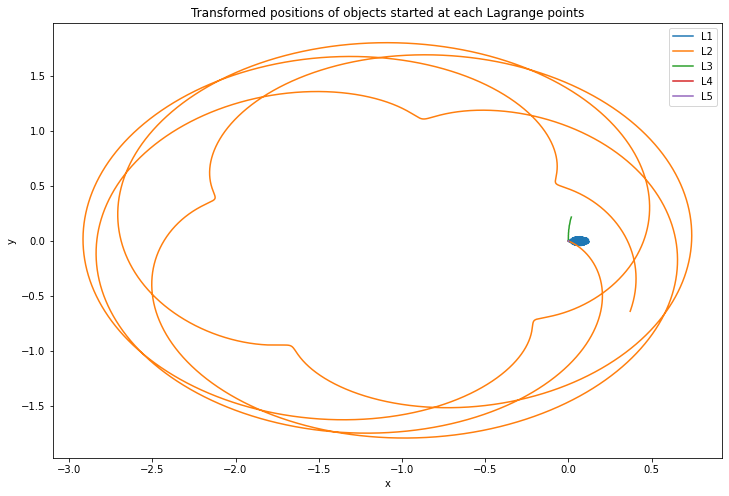

In [9]:
#Verlet Integration for calculating trajectory of masses from Lagrange points
#Simulation parameters
dt = 1e-3
t_initial = 0
t = 0
t_final = 20*np.pi

#Create list of initial positions as lagrange points
x0_list = [np.asarray([L1_x, L1_y]).astype(float), np.asarray([L2_x, L2_y]).astype(float), np.asarray([L3_x, L3_y]).astype(float), np.asarray([L4_x, L4_y]).astype(float), np.asarray([L5_x, L5_y]).astype(float)]
legend_list = []

plt.figure(figsize=(12,8))
#Simulate for each lagrange points
for i in range(len(x0_list)):
    x0 = x0_list[i]

    #Initial veclocity vector
    r0 = np.linalg.norm(x0) #Initial distance to center of mass
    v0_mag = r0 * omega #Magnitude of initial velocity
    v0 = np.asarray([-v0_mag*x0[1]/r0, v0_mag*x0[0]/r0]).astype(float)

    t_arr, rotated_coords = ps6_functions.restricted_three_body_simulate(x0=x0, v0=v0, R_j=R_j, R_s=R_s, omega=omega, t_final=t_final, dt=dt)
    legend_list.append('L'+str(i+1))

    plt.plot(rotated_coords[0,:], rotated_coords[1,:])

plt.legend(legend_list)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Transformed positions of objects started at each Lagrange points')
plt.show()

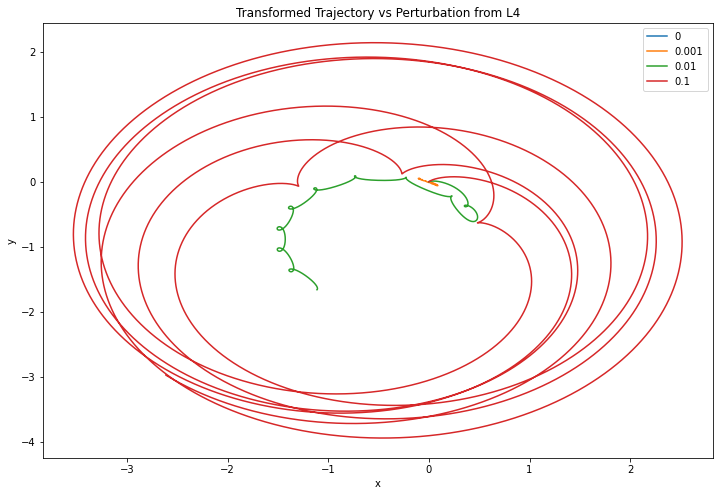

In [11]:
#Testing stability of the Lagrange Point L4
pert_mags = [0, 0.001, 0.01, 0.1] #Perturbations to L4

#Simulation parameters
dt = 1e-3
t_initial = 0
t = 0
t_final = 20*np.pi

plt.figure(figsize=(12,8))
for pert in pert_mags:
    x0 = np.asarray([L4_x+pert, L4_y+pert]).astype(float) #Inıtial Position
    #Initial veclocity vector
    r0 = np.linalg.norm(x0) #Initial distance to center of mass
    v0_mag = r0 * omega #Magnitude of initial velocity
    v0 = np.asarray([-v0_mag*x0[1]/r0, v0_mag*x0[0]/r0]).astype(float)

    t_arr, rotated_coords = ps6_functions.restricted_three_body_simulate(x0=x0, v0=v0, R_j=R_j, R_s=R_s, omega=omega, t_final=t_final, dt=dt)
    legend_list.append('L'+str(i+1))

    plt.plot(rotated_coords[0,:], rotated_coords[1,:])
plt.legend(pert_mags)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Transformed Trajectory vs Perturbation from L4')
plt.show()

Part (d):

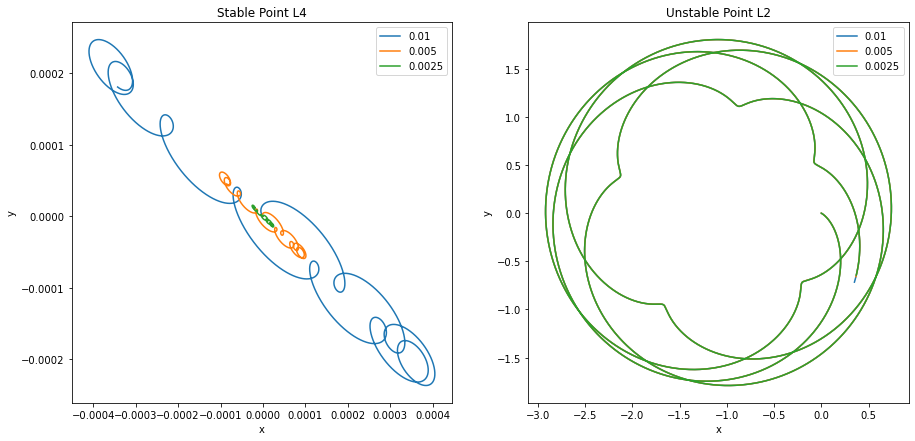

In [14]:
#Simulation parameters
dt_list = [1e-2, 0.5e-2, 0.25e-2]
t_initial = 0
t = 0
t_final = 20*np.pi

fig, axs = plt.subplots(1,2)
fig.set_size_inches(15,7)
for dt in dt_list:
    #Stable point L4
    x0 = np.asarray([L4_x, L4_y]).astype(float) #Inıtial Position
    #Initial veclocity vector
    r0 = np.linalg.norm(x0) #Initial distance to center of mass
    v0_mag = r0 * omega #Magnitude of initial velocity
    v0 = np.asarray([-v0_mag*x0[1]/r0, v0_mag*x0[0]/r0]).astype(float)

    t_arr, rotated_coords = ps6_functions.restricted_three_body_simulate(x0=x0, v0=v0, R_j=R_j, R_s=R_s, omega=omega, t_final=t_final, dt=dt)
    axs[0].plot(rotated_coords[0,:], rotated_coords[1,:])

    #Unstable Point L2
    x0 = np.asarray([L2_x, L2_y]).astype(float) #Inıtial Position
    #Initial veclocity vector
    r0 = np.linalg.norm(x0) #Initial distance to center of mass
    v0_mag = r0 * omega #Magnitude of initial velocity
    v0 = np.asarray([-v0_mag*x0[1]/r0, v0_mag*x0[0]/r0]).astype(float)

    t_arr, rotated_coords = ps6_functions.restricted_three_body_simulate(x0=x0, v0=v0, R_j=R_j, R_s=R_s, omega=omega, t_final=t_final, dt=dt)
    axs[1].plot(rotated_coords[0,:], rotated_coords[1,:])

axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[0].set_title('Stable Point L4')
axs[1].set_title('Unstable Point L2')
axs[0].legend(dt_list)
axs[1].legend(dt_list)
plt.show()